

**Machine Learning I (Semester 1 2025)**
# Tutorial Session 3: Regression

*N. Hernitschek*



This Jupyter notebook gives an introduction to Linear Regression.

It is based on code from the textbook

*An Introduction to Statistical Learning: with Applications in Python.*
James Witten, Hastie, Tibshirani; Springer.

which is vailable for free as PDF: https://www.statlearning.com/


***Exercises required for class participation are in <font color='red'>red</font>.***

---
## Contents
* [The Statsmodels Package](#first-bullet)
* [Linear Regression](#second-bullet)


## 1. The Statsmodels Package <a class="anchor" id="first-bullet"></a>

In the following, we will often use the `statsmodels` package.
It's a Python package that allows users to explore data, estimate statistical models, and perform statistical tests. An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator. `statsmodels` complements SciPy's `stats` module.

You can find more here: 

https://www.statsmodels.org/stable/index.html

### Installing Statsmodels

**Anaconda:**

statsmodels is available through conda provided by Anaconda. The latest release can be installed using:

`conda install -c conda-forge statsmodels`


**PyPI (`pip`):**

To obtain the latest released version of statsmodels using `pip`:

`python -m pip install statsmodels`

## 2. Simple Linear Regression <a class="anchor" id="second-bullet"></a>

Before we get started, we have to import some packages:

### Importing Packages

We import our standard libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We import `statsmodels`:

In [2]:
import statsmodels.api as sm

In [3]:
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

We will also use some functions written for the code from the book (https://www.statlearning.com/) in the
ISLP package.

Installation instructions can be found on the website: https://islp.readthedocs.io/en/latest/installation.html


In [4]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize ,
poly)


### Data Exploration

The dataset we'll look at in this section is the so-called Boston housing dataset. It contains US census data concerning houses in various areas around the city of Boston. Each sample corresponds to a unique area and has about a dozen measures. We should think of samples as rows and measures as columns. The data was first published in 1978 and is quite small, containing only 506 samples.

The `Boston` dataset is contained in the `ISLP` package. We will build a regression model to predict `medv` (median house value) using 13 predictors such as `rmvar` (average number of rooms per house), age (proportion of owner-occupied units built prior to 1940), and
`lstat` (percent of households with low socioeconomic status). We will use `statsmodels` for this task, as it implements several commonly used regression methods.


To access the data, we use a simple loading function `load_data()` that is included in the `ISLP` package:
 


In [6]:
Boston = load_data("Boston")
Boston.columns

You can type `Boston?` to find out more about these data. (works only on the console)

The data was loaded into a `Pandas DataFrame`.

Oftentimes, data is stored in tables, which means it can be saved as a comma-separated variable (CSV) file. This format, and many others, can be read into Python as a `DataFrame` object, using the `Pandas` library. Other common formats include tab-separated variable (TSV), SQL tables, and JSON data structures. `Pandas` has support for all of these.


Now that the data has been loaded in its entirety, we take a look at the `DataFrame`. We can do `df.head()` or `df.tail()` to see a few rows of the data and `len(df)` to make sure the number of samples is what we expect.




In [8]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [62]:
Boston.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


Each row is labeled with an index value, as seen in bold on the left side of the table. By default, these are a set of integers starting at 0 and incrementing by one for each row.

In [9]:
len(Boston)        

506

Printing `DataFrame.dtypes` will show the datatype contained within each column.

In [65]:
print(Boston.dtypes)

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object


The next thing we need to do is clean the data by dealing with any missing data, which Pandas automatically sets as NaN values. These can be identified by running `DataFrame.isnull()`, which returns a Boolean `DataFrame` of the same shape as our input. To get the number of `NaN`s per column, we can do `DataFrame.isnull().sum()`.

Run the next cell to calculate the number of `NaN` values in each column:

In [10]:
Boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

For this dataset, we see there are no `NaN`, which means we have no immediate work to do in cleaning the data and can move on.

Before we start with the linear regression, it is useful to get a better sense of our data set.

We use `DataFrame.describe()`to compute various properties including the mean, standard deviation, minimum, and maximum for each column. This table gives a high-level idea of how everything is distributed.

In [12]:
#Boston.describe()


Boston['crim'].describe()


count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

For the final step in our dataset exploration exercise, we'll visualize our data using `seaborn`'s `pairplot` function.


Similar to a heatmap or a corner plot, this visualization gives us a simple overview of the correlations.


We visualize here the correlations between five selected columns: 

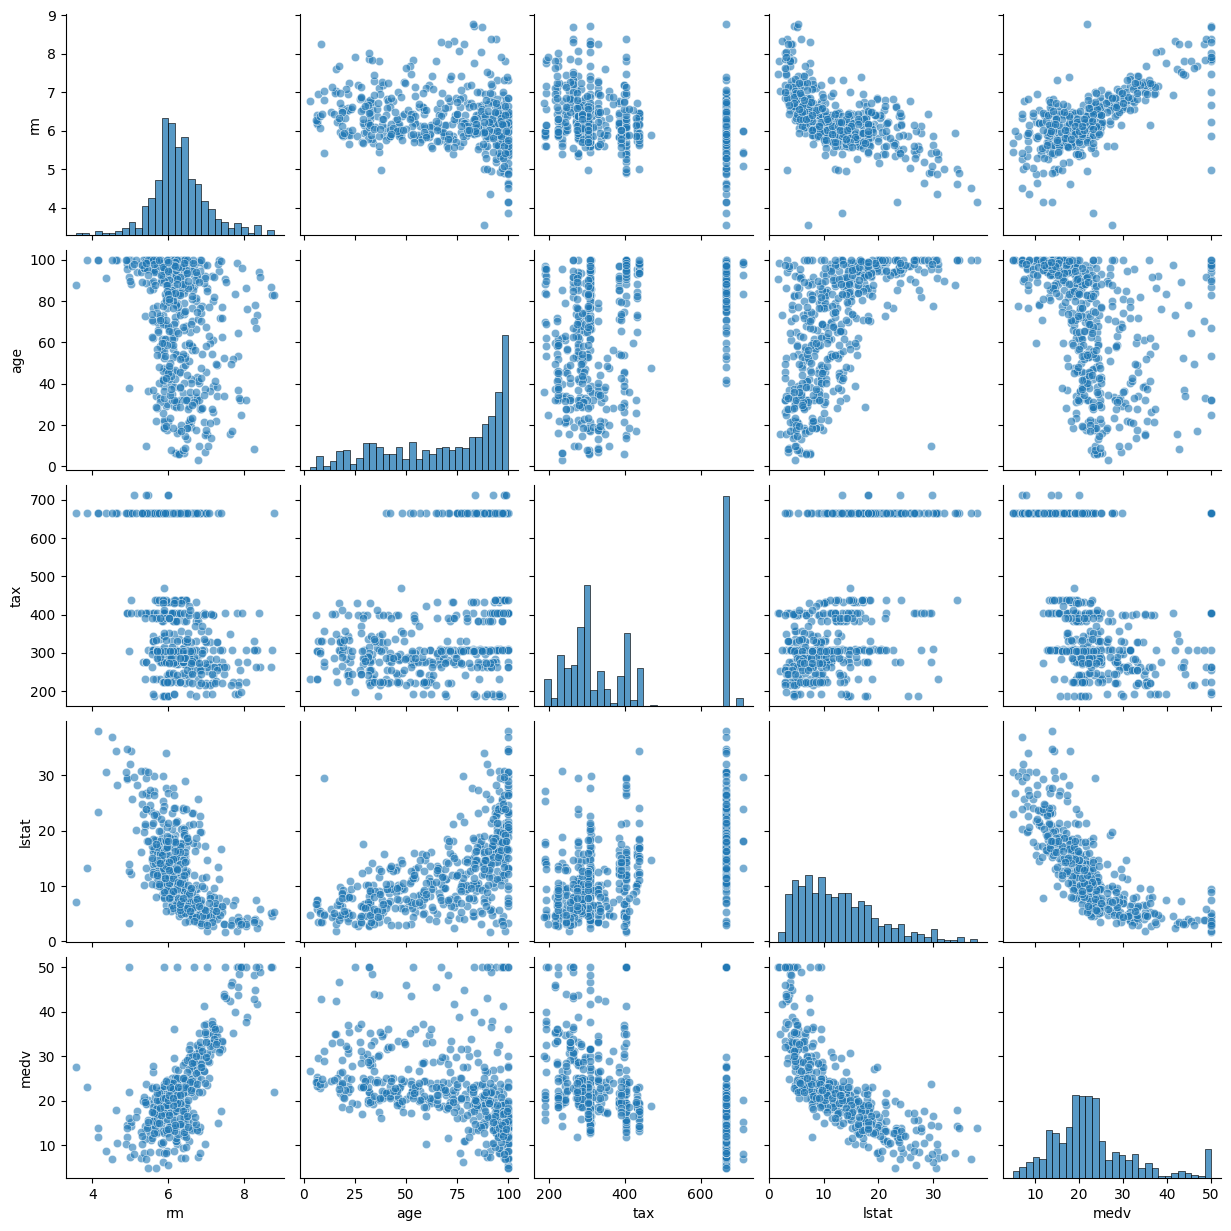

In [13]:
import seaborn as sns

cols = ['rm', 'age', 'tax', 'lstat', 'medv']

sns.pairplot(Boston[cols], 
             plot_kws={'alpha': 0.6},
             diag_kws={'bins': 30})



Looking at the histograms on the diagonal, we see the following:

*  `rm` and `medv` have the closest shape to normal distributions.
*  `age` is skewed to the left and `lstat` is skewed to the right (this may seem counterintuitive but skew is defined in terms of where the mean is positioned in relation to the max).
*  For `tax`, we find a large amount of the distribution is around 700. This is also evident from the scatter plots.
        
        
        
Taking a closer look at the `mdev` histogram in the bottom right, we actually see something similar to `tax` where there is a large upper-limit bin around $50,000. Recall when we did `DataFrame.describe()`, the min and max of `mdev` was 5k and 50k, respectively. This suggests that median house values in the dataset were capped at 50k.        


### Simple Linear Regression Example


We start by using the `sm.OLS()` function to fit a simple linear regression model. Our response will be `medv` and `lstat` will be the single predictor. For this model, we can create the model matrix by hand.


In [16]:
X = pd.DataFrame ({'intercept': np.ones(Boston.shape[0]),
'lstat': Boston['lstat']})
X[:4]


,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


From that, we extract the response, and fit the model.

In [17]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In this code, `sm.OLS()` does not fit the model; it specifies the model, and then
`model.fit()` does the actual fitting.

The `ISLP` function `summarize()` produces a simple table of the parameter estimates, their standard errors, t-statistics and p-values. The function `summarize()` takes a single argument, such as the object `results` returned here by the `fit` method, and returns such a summary.

In [18]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


Before we describe other methods for working with fitted models, we
outline a more useful and general framework for constructing a model ma-
trix `X`.

### Using Transformations: Fit and Transform

Our model above has a single predictor, and constructing `X` was straight-forward. In practice we often fit models with more than one predictor, typically selected from an array or data frame. We may wish to introduce transformations to the variables before fitting the model, specify interactions between variables, and expand some particular variables into sets of variables (e.g. polynomials). The `sklearn` package has a particular notions for this type of task: a transform. A transform is an object that is created with some parameters as arguments. The object has two main methods: `fit()` and `transform()`.
    

We provide a general approach for specifying models and constructing
the model matrix through the transform ModelSpec() in the ISLP library.

`ModelSpec()` in the preamble creates a transform object, and then a pair of methods `transform()` and `fit()` are used to construct a corresponding model matrix.

We first describe this process for our simple regression model using a
single predictor `lstat` in the `Boston` data frame, but will use it repeatedly
in more complex tasks in this and other labs in this book. In our case the
transform is created by the expression `design = MS(['lstat'])`.

The `fit()` method takes the original array and may do some initial computations on it, as specified in the transform object. For example, it may
compute means and standard deviations for centering and scaling. The `transform()` method applies the fitted transformation to the array of data,
and produces the model matrix.

In [21]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In this simple case, the `fit()` method does very little; it simply checks that
the variable `lstat` specified in `design` exists in `Boston`. Then `transform()`
constructs the model matrix with two columns: an `intercept` and the variable `lstat`.
    
These two operations can be combined with the `fit_transform()` method.

In [22]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


Note that, as in the previous code chunk when the two steps were done
separately, the `design` object is changed as a result of the `fit()` operation.
The power of this pipeline will become clearer when we fit more complex
models that involve interactions and transformations.
Let's return to our fitted regression model. The object `results` has several
methods that can be used for inference. We already presented a function
`summarize()` for showing the essentials of the fit. For a full and somewhat
exhaustive summary of the fit, we can use the `summary()` method.

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 09 May 2024   Prob (F-statistic):           5.08e-88
Time:                        13:35:51   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fitted coefficients can also be retrieved as the `params` attribute of `results`.

In [20]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

The `get_prediction()` method can be used to obtain predictions, and
produce **confidence intervals** and prediction intervals for the prediction of 
`medv` for given values of `lstat`.

We first create a new data frame, in this case containing only the variable `lstat`, with the values for this variable at which we wish to make
predictions. We then use the `transform()` method of `design` to create the corresponding model matrix.

In [28]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


Next we compute the predictions at `newX`, and view them by extracting
the `predicted_mean` attribute.

In [29]:
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

We can produce confidence intervals for the predicted values.

In [30]:
 new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

Prediction intervals are computing by setting `obs=True`:

In [40]:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

For instance, the 95% confidence interval associated with an `lstat` value of
10 is (24.47, 25.63), and the 95% prediction interval is (12.82, 37.28). As
expected, the confidence and prediction intervals are centered around the
same point (a predicted value of 25.05 for `medv` when `lstat` equals 10), but
the latter are substantially wider.

Next we will plot `medv` and `lstat` using `DataFrame.plot.scatter()`, and
wish to add the regression line to the resulting plot.

### Defining Functions

While there is a function within the `ISLP` package that adds a line to an
existing plot, we take this opportunity to define our first function to do so.

In [21]:
def abline(ax, b, m):
  #Add a line with slope m and intercept b to ax"
  xlim = ax.get_xlim()
  ylim = [m * xlim [0] + b, m * xlim [1] + b]
  ax.plot(xlim , ylim)

A few things are illustrated above. First we see the syntax for defining a
function:`def funcname(...)`. The function has arguments which are here `ax`, `b`, `m` where
`ax` is an `axis` object for an exisiting plot, `b` is the intercept and `m` is the slope
of the desired line. Other plotting options can be passed on to `ax.plot` by
including additional optional arguments as follows:

In [22]:
def abline(ax , b, m, *args , ** kwargs):
# Add a line with slope m and intercept b to ax"
  xlim = ax.get_xlim()
  ylim = [m * xlim [0] + b, m * xlim [1] + b]
  ax.plot(xlim , ylim , *args , ** kwargs)

The addition of `*args` allows any number of non-named arguments to
abline, while `*kwargs` allows any number of named arguments (such as
`linewidth=3`) to `abline`. In our function, we pass these arguments verbatim
to `ax.plot` above. 

Readers interested in learning more about functions are
referred to the section on defining functions in docs.python.org/tutorial.


Let's use our new function to add this regression line to a plot of `medv` vs. `lstat`.

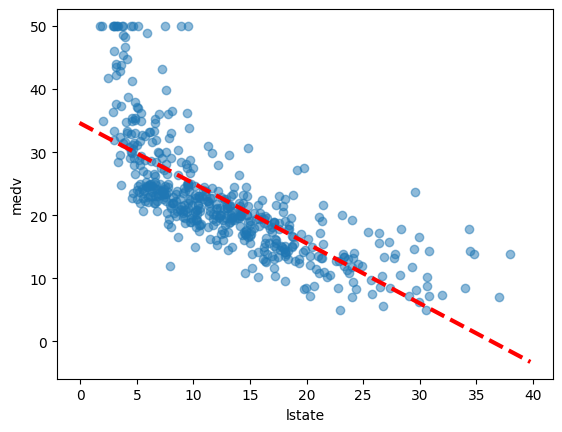

In [23]:
fig, ax = plt.subplots(1)

ax.scatter(Boston['lstat'],Boston['medv'], alpha=0.5)


plt.xlabel("lstate")
plt.ylabel("medv")

abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)

## Summary <a class="anchor" id="fourth-bullet"></a>

At this point, all of you should have:
*  an understanding about how to explore data sets, including plotting them to see possible correlations
*  an understanding about how to carry out simple linear regression, including plotting the resulting fit.